### Import dependencies

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import KFold, cross_val_score, StratifiedKFold, GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

from xgboost import XGBClassifier
from mlxtend.classifier import StackingCVClassifier
import warnings
warnings.filterwarnings('ignore')

### Read files

In [3]:
os.chdir("D:\\Personnel Development\\IPBA\\05 GLM Statistical modelling with Python")
dat1= pd.read_csv('adult.csv')

In [4]:
dat=dat1[0:500]

In [5]:
dat.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


### Explore data

In [6]:
dat.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,37.338000,188303.492000,10.008000,1470.008000,70.916000,40.272000
std,13.652712,101198.741043,2.543398,9298.308254,354.580591,11.981366
min,17.000000,20308.000000,2.000000,0.000000,0.000000,5.000000
25%,26.000000,110718.250000,9.000000,0.000000,0.000000,38.750000
50%,35.000000,177832.000000,10.000000,0.000000,0.000000,40.000000
75%,46.000000,238286.500000,12.000000,0.000000,0.000000,45.000000
max,80.000000,599057.000000,16.000000,99999.000000,2415.000000,99.000000


In [7]:
dat.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

In [8]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 15 columns):
age                500 non-null int64
workclass          500 non-null object
fnlwgt             500 non-null int64
education          500 non-null object
educational-num    500 non-null int64
marital-status     500 non-null object
occupation         500 non-null object
relationship       500 non-null object
race               500 non-null object
gender             500 non-null object
capital-gain       500 non-null int64
capital-loss       500 non-null int64
hours-per-week     500 non-null int64
native-country     500 non-null object
income             500 non-null object
dtypes: int64(6), object(9)
memory usage: 58.7+ KB


In [9]:
col=dat.columns[dat.dtypes=="object"].tolist()
print(col)
type(col)

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'income']


list

In [10]:
print(dat.workclass.unique())

['Private' 'Local-gov' '?' 'Self-emp-not-inc' 'Federal-gov' 'State-gov'
 'Self-emp-inc']


In [11]:
print(dat.education.unique())

['11th' 'HS-grad' 'Assoc-acdm' 'Some-college' '10th' 'Prof-school'
 '7th-8th' 'Bachelors' 'Masters' 'Doctorate' '5th-6th' 'Assoc-voc' '9th'
 '12th' '1st-4th']


In [12]:
print(dat["marital-status"].unique())

['Never-married' 'Married-civ-spouse' 'Widowed' 'Divorced' 'Separated'
 'Married-spouse-absent' 'Married-AF-spouse']


In [13]:
print(dat["occupation"].unique())

['Machine-op-inspct' 'Farming-fishing' 'Protective-serv' '?'
 'Other-service' 'Prof-specialty' 'Craft-repair' 'Adm-clerical'
 'Exec-managerial' 'Tech-support' 'Sales' 'Priv-house-serv'
 'Transport-moving' 'Handlers-cleaners' 'Armed-Forces']


In [14]:
print(dat["relationship"].unique())

['Own-child' 'Husband' 'Not-in-family' 'Unmarried' 'Wife' 'Other-relative']


In [15]:
print(dat["race"].unique())

['Black' 'White' 'Asian-Pac-Islander' 'Other' 'Amer-Indian-Eskimo']


In [16]:
print(dat["gender"].unique())

['Male' 'Female']


In [17]:
print(dat["native-country"].unique())

['United-States' '?' 'Peru' 'Guatemala' 'Mexico' 'Dominican-Republic'
 'Ireland' 'Germany' 'Philippines' 'Thailand' 'Haiti' 'El-Salvador'
 'Puerto-Rico' 'Vietnam' 'South' 'Columbia' 'Japan' 'India' 'Cambodia'
 'Poland' 'Laos']


#### Creating Dependent Variable

In [18]:
print(dat["income"].unique())

['<=50K' '>50K']


In [19]:
# Creating dependent variable list with categories
y = pd.DataFrame(np.where(dat["income"] == ">50K" , 1, 0))
#y=dat["income"].map(lambda x: 1 if x== ">50K" else 0)

In [20]:
y[0:5]

,0
0,0
1,0
2,1
3,1
4,0


In [21]:
len(y)

500

### Preparing Train and Test Data

In [22]:
X=dat.drop(['income'],axis=1)

In [23]:
X.head(2)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States


In [24]:
X.shape

(500, 14)

In [25]:
X=pd.get_dummies(X)

In [26]:
X.shape

(500, 84)

In [27]:
X.head()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Private,...,native-country_Laos,native-country_Mexico,native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Puerto-Rico,native-country_South,native-country_Thailand,native-country_United-States,native-country_Vietnam
0,25,226802,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,38,89814,9,0,0,50,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,28,336951,12,0,0,40,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,44,160323,10,7688,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,18,103497,10,0,0,30,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [28]:
y.shape

(500, 1)

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=200)

### Model fitting using Support Vector Classification.

In [30]:
from sklearn.svm import SVC
model = SVC(kernel='rbf',C=30,gamma='auto')
model.fit(X_train,y_train)
model.score(X_test, y_test)

0.792

In [31]:
rssvc = RandomizedSearchCV(SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rssvc.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='auto', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=None,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [1, 10, 20],
                                        'kernel': ['rbf', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [32]:
rssvc.best_params_

{'kernel': 'linear', 'C': 20}

In [33]:
pd.DataFrame(rssvc.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,rbf,0.792
1,20,linear,0.808


In [34]:
stsvc= pd.DataFrame(rssvc.cv_results_)[['params','mean_test_score']]
stsvc["Model"]=stsvc["params"].map (lambda x:"Support Vector")
stsvc

,params,mean_test_score,Model
0,"{'kernel': 'rbf', 'C': 10}",0.792,Support Vector
1,"{'kernel': 'linear', 'C': 20}",0.808,Support Vector


In [35]:
rssvc.cv_results_

{'mean_fit_time': array([2.39915371e-02, 2.50161560e+01]),
 'std_fit_time': array([6.69602433e-03, 7.75043681e+00]),
 'mean_score_time': array([0.00720797, 0.00624938]),
 'std_score_time': array([0.00300265, 0.0076539 ]),
 'param_kernel': masked_array(data=['rbf', 'linear'],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_C': masked_array(data=[10, 20],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'kernel': 'rbf', 'C': 10}, {'kernel': 'linear', 'C': 20}],
 'split0_test_score': array([0.8, 0.8]),
 'split1_test_score': array([0.8 , 0.82]),
 'split2_test_score': array([0.8 , 0.88]),
 'split3_test_score': array([0.78, 0.78]),
 'split4_test_score': array([0.78, 0.76]),
 'mean_test_score': array([0.792, 0.808]),
 'std_test_score': array([0.00979796, 0.04118252]),
 'rank_test_score': array([2, 1])}

### Model fitting using Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=100, random_state=200)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.84

In [37]:
rsrfc = RandomizedSearchCV(RandomForestClassifier(), {
        'n_estimators': [50,100,250,500],
        'max_depth': [2,3,4,5]
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rsrfc.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [38]:
rsrfc.best_params_

{'n_estimators': 250, 'max_depth': 4}

In [39]:
strfc= pd.DataFrame(rsrfc.cv_results_)[['params','mean_test_score']]
strfc["Model"]=strfc["params"].map (lambda x:"Random Forest")
strfc

,params,mean_test_score,Model
0,"{'n_estimators': 100, 'max_depth': 3}",0.832,Random Forest
1,"{'n_estimators': 250, 'max_depth': 4}",0.848,Random Forest


In [40]:
rsrfc.cv_results_

{'mean_fit_time': array([0.10359864, 0.16558895]),
 'std_fit_time': array([0.0669696 , 0.01591918]),
 'mean_score_time': array([0.00937257, 0.01562538]),
 'std_score_time': array([7.65266986e-03, 4.36403701e-06]),
 'param_n_estimators': masked_array(data=[100, 250],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[3, 4],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_estimators': 100, 'max_depth': 3},
  {'n_estimators': 250, 'max_depth': 4}],
 'split0_test_score': array([0.84, 0.86]),
 'split1_test_score': array([0.84, 0.84]),
 'split2_test_score': array([0.84, 0.84]),
 'split3_test_score': array([0.78, 0.82]),
 'split4_test_score': array([0.86, 0.88]),
 'mean_test_score': array([0.832, 0.848]),
 'std_test_score': array([0.02712932, 0.02039608]),
 'rank_test_score': array([2, 1])}

### Model fitting using Decision Tree Classifier

In [41]:
rsdtc = RandomizedSearchCV(DecisionTreeClassifier(), {
        'max_features': [None, "auto", "sqrt", "log2"],
        'max_depth': [2,3,4,5]
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rsdtc.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort='deprecated',
                                                    random_state=None,
          

In [42]:
stdtc=pd.DataFrame(rsdtc.cv_results_)[['params','mean_test_score']]
stdtc["Model"]=stdtc["params"].map (lambda x:"Decision Tree")
stdtc

,params,mean_test_score,Model
0,"{'max_features': None, 'max_depth': 5}",0.836,Decision Tree
1,"{'max_features': 'auto', 'max_depth': 4}",0.824,Decision Tree


### Model fitting using KNeighbors Classifier

In [43]:
rsknc = RandomizedSearchCV(KNeighborsClassifier(), {
        'n_neighbors': [6,7,8,9,10,11,12,14,16,18,20],
        'algorithm': ['auto'], 
        'weights': ['uniform', 'distance'],
        'leaf_size': list(range(1,50,5))
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rsknc.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'algorithm': ['auto'],
                                        'leaf_size': [1, 6, 11, 16, 21, 26, 31,
                                                      36, 41, 46],
                                        'n_neighbors': [6, 7, 8, 9, 10, 11, 12,
                                                        14, 16, 18, 20],
                                        'weights': ['uniform', 'distance']},
                   pre_dispatch='

In [44]:
rsknc.best_params_

{'weights': 'uniform', 'n_neighbors': 16, 'leaf_size': 41, 'algorithm': 'auto'}

In [45]:
stknc=pd.DataFrame(rsknc.cv_results_)[['params','mean_test_score']]
stknc["Model"]=stknc["params"].map (lambda x:"K Neighbour")
stknc

,params,mean_test_score,Model
0,"{'weights': 'distance', 'n_neighbors': 16, 'le...",0.752,K Neighbour
1,"{'weights': 'uniform', 'n_neighbors': 16, 'lea...",0.792,K Neighbour


### Model fitting using Logistic Regression

In [46]:
rslgr = RandomizedSearchCV(LogisticRegression(), {
        'C': [0.1, 1, 10, 100]
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rslgr.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=2, n_jobs=None,
                   param_distributions={'C': [0.1, 1, 10, 100]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [47]:
stlgr=pd.DataFrame(rslgr.cv_results_)[['params','mean_test_score']]
stlgr["Model"]=stlgr["params"].map (lambda x:"Logistic Regression")
stlgr

,params,mean_test_score,Model
0,{'C': 10},0.824,Logistic Regression
1,{'C': 0.1},0.824,Logistic Regression


### Model fitting using Gradient Boosting Classifier

In [48]:
rsgbc = RandomizedSearchCV(GradientBoostingClassifier(), {
        'learning_rate': [0.1, 0.2, 0.5],
        'n_estimators': [50, 100, 150],
        'max_depth': [2,3]
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rsgbc.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                        criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                    

In [49]:
stgbc=pd.DataFrame(rsgbc.cv_results_)[['params','mean_test_score']]
stgbc["Model"]=stgbc["params"].map (lambda x:"Gradient Boosting")
stgbc

,params,mean_test_score,Model
0,"{'n_estimators': 150, 'max_depth': 2, 'learnin...",0.868,Gradient Boosting
1,"{'n_estimators': 150, 'max_depth': 2, 'learnin...",0.852,Gradient Boosting


### Model fitting using XGB Classifier

In [50]:
rsxgb = RandomizedSearchCV(XGBClassifier(), {
        'learning_rate': [0.1, 0.2, 0.3],
        'n_estimators': [100, 150, 500, 1000],
        'max_depth': [3,4,5],
        'gamma': [0, 0.2, 0.5]
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rsxgb.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           scale_pos_weight=None,
                                           subsample=None, tree_method=None,
                                     

In [51]:
stxgb=pd.DataFrame(rsxgb.cv_results_)[['params','mean_test_score']]
stxgb["Model"]=stxgb["params"].map (lambda x:"XGB")
stxgb

,params,mean_test_score,Model
0,"{'n_estimators': 100, 'max_depth': 3, 'learnin...",0.832,XGB
1,"{'n_estimators': 150, 'max_depth': 4, 'learnin...",0.848,XGB


### Model fitting using Gaussian Naive Bayes 

In [52]:
rsgnb = RandomizedSearchCV(GaussianNB(),{"priors":[None], "var_smoothing":[1e-09]}, cv=5, 
    return_train_score=False)
rsgnb.fit(X_test, y_test)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=GaussianNB(priors=None, var_smoothing=1e-09),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'priors': [None],
                                        'var_smoothing': [1e-09]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

In [53]:
stgnb=pd.DataFrame(rsgnb.cv_results_)[['params','mean_test_score']]
stgnb["Model"]=stgnb["params"].map (lambda x:"Gaussian Naive Bayes")
stgnb

,params,mean_test_score,Model
0,"{'var_smoothing': 1e-09, 'priors': None}",0.82,Gaussian Naive Bayes


### Tabulating summary of mean scores

In [54]:
column_names = ["Model", "params", "mean_test_score"]
scoretab = pd.DataFrame(columns = column_names)
scoretab
scoretab=scoretab.append(stsvc) 
scoretab=scoretab.append(strfc) 
scoretab=scoretab.append(stdtc) 
scoretab=scoretab.append(stknc) 
scoretab=scoretab.append(stlgr) 
scoretab=scoretab.append(stgbc) 
scoretab=scoretab.append(stxgb)
scoretab=scoretab.append(stgnb)
st=scoretab.sort_values('mean_test_score', ascending=False)
st.reset_index(drop=True, inplace=True)
st.insert(0, 'Sl No', range(1, 1 + len(st)))
st

,Sl No,Model,mean_test_score,params
0,1,Gradient Boosting,0.868,"{'n_estimators': 150, 'max_depth': 2, 'learnin..."
1,2,Gradient Boosting,0.852,"{'n_estimators': 150, 'max_depth': 2, 'learnin..."
2,3,Random Forest,0.848,"{'n_estimators': 250, 'max_depth': 4}"
3,4,XGB,0.848,"{'n_estimators': 150, 'max_depth': 4, 'learnin..."
4,5,Decision Tree,0.836,"{'max_features': None, 'max_depth': 5}"
5,6,Random Forest,0.832,"{'n_estimators': 100, 'max_depth': 3}"
6,7,XGB,0.832,"{'n_estimators': 100, 'max_depth': 3, 'learnin..."
7,8,Decision Tree,0.824,"{'max_features': 'auto', 'max_depth': 4}"
8,9,Logistic Regression,0.824,{'C': 10}
9,10,Logistic Regression,0.824,{'C': 0.1}


### Model fitting using using TPOT

In [55]:
from tpot import TPOTClassifier

In [56]:
tpot = TPOTClassifier(generations=5, population_size=50, verbosity=2, random_state=200)
tpot.fit(X_train, y_train)
print(tpot.score(X_test, y_test))
tpot.export('tpot_advertise_pipeline.py')

Generation 1 - Current best internal CV score: 0.8
Generation 2 - Current best internal CV score: 0.8
Generation 3 - Current best internal CV score: 0.8
Generation 4 - Current best internal CV score: 0.8000000000000002
Generation 5 - Current best internal CV score: 0.812

Best pipeline: LinearSVC(DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=1, min_samples_leaf=1, min_samples_split=13), C=0.1, dual=False, loss=squared_hinge, penalty=l1, tol=0.0001)
0.844


In [57]:
predictions = tpot.predict(X_test)

In [58]:
print(type(predictions))
print(len(predictions))

<class 'numpy.ndarray'>
250


In [59]:
predictions=pd.DataFrame(predictions)

In [60]:
print(type(predictions))
print(len(predictions))

<class 'pandas.core.frame.DataFrame'>
250


In [61]:
print(type(y_test))
print(len(y_test))

<class 'pandas.core.frame.DataFrame'>
250


In [62]:
y_test.reset_index(inplace = True) 

In [63]:
y_test

,index,0
0,157,0
1,88,0
2,383,0
3,125,0
4,445,1
5,13,0
6,438,0
7,374,0
8,235,0
9,256,0


In [64]:
y_test.rename(columns={0:"y_test"}, inplace=True)

In [65]:
# Checking the predictions on train and test data
result=pd.concat([y_test,predictions],axis=1)

In [66]:
result.head()

,index,y_test,0
0,157,0,0
1,88,0,0
2,383,0,0
3,125,0,0
4,445,1,1


In [67]:
result.rename(columns={0:"Predictions"}, inplace=True)
result.head()

,index,y_test,Predictions
0,157,0,0
1,88,0,0
2,383,0,0
3,125,0,0
4,445,1,1


In [68]:
y_true=list(result['y_test'])
print(y_true)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0]


In [69]:
y_pred=list(result['Predictions'])
print(y_pred)

[0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0]


### Calculating evaluation metrics (numerical)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import matthews_corrcoef 
from sklearn.metrics import average_precision_score
from sklearn.metrics import confusion_matrix

In [81]:
print('Accuracy score          = ', accuracy_score(y_true, y_pred))          # fraction of correct predictions
print('Balanced accuracy score = ', balanced_accuracy_score(y_true, y_pred)) # good for imbalanced datasets
print('Precision score         = ', precision_score(y_true, y_pred))         # ability of the classifier not to label as positive a sample that is negative
print('Recall   score          = ', recall_score(y_true, y_pred))            # ability of the classifier to find all the positive samples
print('F1 score                = ', f1_score(y_true, y_pred))                # weighted harmonic mean of the precision and recall. Best score =1,worst =0 
print('ROC_AUC score           = ', roc_auc_score(y_true, y_pred))           # probability that a classifier will rank a randomly chosen positive instance higher than a randomly chosen negative one (assuming 'positive' ranks higher than 'negative')
print('Average precision score = ', average_precision_score(y_true, y_pred)) # value is between 0 and 1 and higher is better
print('Matthews correlation coefficient = ',matthews_corrcoef(y_true, y_pred))#quality of binary (two-class) classifications.1= perfect prediction, 0=average random, -1=inverse
print('Confusion matrix        = ')
print(confusion_matrix(y_true, y_pred))

Accuracy score          =  0.844
Balanced accuracy score =  0.6817210567210568
Precision score         =  0.7241379310344828
Recall   score          =  0.40384615384615385
F1 score                =  0.5185185185185185
ROC_AUC score           =  0.6817210567210567
Average precision score =  0.41644031830238726
Matthews correlation coefficient =  0.46065350550047707
Confusion matrix        = 
[[190   8]
 [ 31  21]]


### Evaluation metrics (graphical)

In [82]:
# ROC curve
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_true,y_pred)
x,y=np.arange(0,1.1,0.1),np.arange(0,1.1,0.1)

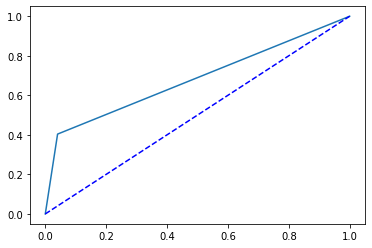

In [73]:
plt.plot(fpr,tpr,"-")
plt.plot(x,y,'b--')

Confusion matrix, without normalization
[[190   8]
 [ 31  21]]


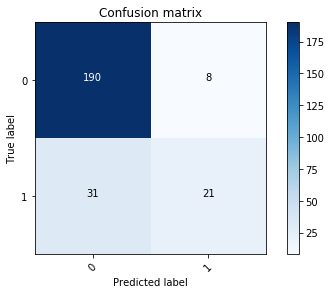

In [74]:
# Confusion matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

cm = confusion_matrix(y_true, y_pred)
np.set_printoptions(precision=2)

plt.figure()
plot_confusion_matrix(cm, classes=[0, 1],
                      title='Confusion matrix')

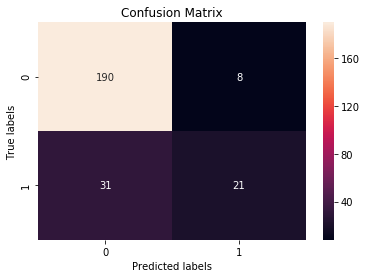

In [83]:
# Another method for generating confusion matrix using SNS Heatmap function
import seaborn as sns
import matplotlib.pyplot as plt     

cm = confusion_matrix(y_true, y_pred)
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax,fmt='g'); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 

### Building a pipeline for Parameter Tuning

In [75]:
# Initialising the pipeline with one estimator  
pipe = Pipeline(steps=[('classifier', SVC())])

In [77]:
# Add a dict of classifier and related parameters in list

# params_grid = [{
                'classifier':[SVC()],
                'classifier__C': [0.1, 1, 10, 100],
                'classifier__gamma': [0.001, 0.0001]
                },
              {
                'classifier': [DecisionTreeClassifier()],
                'classifier__max_depth': [2,3,4],
                'classifier__max_features': [None, "auto", "sqrt", "log2"]
              },
              {
                'classifier': [KNeighborsClassifier()],
                'classifier__n_neighbors': [6,7,8,9,10,11,12,14,16,18,20],
                'classifier__algorithm': ['auto'],
                'classifier__weights': ['uniform', 'distance'],
                'classifier__leaf_size': list(range(1,50,5))
              }, 
              {
                'classifier': [LogisticRegression()],
                'classifier__C': [0.1, 1, 10, 100],
              },
              {
                'classifier': [RandomForestClassifier()],
                'classifier__n_estimators': ,
                'classifier__max_depth': [2, 3, 4, 5],
              },
              {
                'classifier': [GradientBoostingClassifier()],
                'classifier__learning_rate': [0.1, 0.2, 0.5],
                'classifier__n_estimators': [50, 100, 150],
                'classifier__max_depth': [2,3]
              },
              {
                'classifier': [XGBClassifier()],
                'classifier__learning_rate': [0.1, 0.2, 0.3],
                'classifier__n_estimators': [100, 150, 500, 1000],
                'classifier__max_depth': [3,4,5],
                'classifier__gamma': [0, 0.2, 0.5]  
              },
              {
                'classifier': [GaussianNB()]
              }]


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 12)

In [ ]:
gd.best_estimator_.fit(X_train, y_train)
y_pred_1 = gd.best_estimator_.predict(X_test)

In [ ]:
best_model = KNeighborsClassifier(algorithm='auto', 
                                  leaf_size=26,
                                  metric='minkowski', 
                                  metric_params=None,
                                  n_neighbors=18, 
                                  p=2,
                                  weights='uniform')



In [ ]:
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)